In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")
import seaborn as sn
import numpy as np

In [2]:
df=pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
df=df.drop(['Unnamed: 0'],axis=1)
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [5]:
df.isnull().values.any()

False

In [6]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [8]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [9]:
for i in range(len(df.Date)):
    df.Date[i]=int(df.Date[i][5:7])
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,12,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,12,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,12,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,11,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,1,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,1,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,1,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [10]:
for i in range(len(df.year)):
    df.year[i]=int(df.year[i]-2000)
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,12,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,15,Albany
1,12,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,15,Albany
2,12,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,15,Albany
3,12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,15,Albany
4,11,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,15,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,18,WestTexNewMexico
18245,1,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,18,WestTexNewMexico
18246,1,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,18,WestTexNewMexico
18247,1,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,18,WestTexNewMexico


In [11]:
dicty={}
for i in df[['type']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
dicty

{'type': {'conventional': 0, 'organic': 1}}

In [12]:
for i in ['type']:
    df[i]=df[i].apply(lambda x:dicty[i][x])
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,12,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,15,Albany
1,12,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,15,Albany
2,12,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,15,Albany
3,12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,15,Albany
4,11,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,15,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,18,WestTexNewMexico
18245,1,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,18,WestTexNewMexico
18246,1,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,18,WestTexNewMexico
18247,1,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,18,WestTexNewMexico


In [13]:
dicty={}
for i in df[['region']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
dicty

{'region': {'Albany': 0,
  'Atlanta': 1,
  'BaltimoreWashington': 2,
  'Boise': 3,
  'Boston': 4,
  'BuffaloRochester': 5,
  'California': 6,
  'Charlotte': 7,
  'Chicago': 8,
  'CincinnatiDayton': 9,
  'Columbus': 10,
  'DallasFtWorth': 11,
  'Denver': 12,
  'Detroit': 13,
  'GrandRapids': 14,
  'GreatLakes': 15,
  'HarrisburgScranton': 16,
  'HartfordSpringfield': 17,
  'Houston': 18,
  'Indianapolis': 19,
  'Jacksonville': 20,
  'LasVegas': 21,
  'LosAngeles': 22,
  'Louisville': 23,
  'MiamiFtLauderdale': 24,
  'Midsouth': 25,
  'Nashville': 26,
  'NewOrleansMobile': 27,
  'NewYork': 28,
  'Northeast': 29,
  'NorthernNewEngland': 30,
  'Orlando': 31,
  'Philadelphia': 32,
  'PhoenixTucson': 33,
  'Pittsburgh': 34,
  'Plains': 35,
  'Portland': 36,
  'RaleighGreensboro': 37,
  'RichmondNorfolk': 38,
  'Roanoke': 39,
  'Sacramento': 40,
  'SanDiego': 41,
  'SanFrancisco': 42,
  'Seattle': 43,
  'SouthCarolina': 44,
  'SouthCentral': 45,
  'Southeast': 46,
  'Spokane': 47,
  'StLouis'

In [14]:
for i in ['region']:
    df[i]=df[i].apply(lambda x:dicty[i][x])
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,12,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,15,0
1,12,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,15,0
2,12,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,15,0
3,12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,15,0
4,11,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,18,53
18245,1,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,18,53
18246,1,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,18,53
18247,1,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,18,53


In [15]:
df = df.astype({'Date': np.int})

In [16]:
df.describe()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,6.177215,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,16.147899,26.495644
std,3.534130,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788
min,1.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,15.000000,0.000000
25%,3.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,15.000000,13.000000
50%,6.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,16.000000,26.000000
75%,9.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,17.000000,40.000000
max,12.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,18.000000,53.000000


In [17]:
df.corr()['AveragePrice']

Date            0.162409
AveragePrice    1.000000
Total Volume   -0.192752
4046           -0.208317
4225           -0.172928
4770           -0.179446
Total Bags     -0.177088
Small Bags     -0.174730
Large Bags     -0.172940
XLarge Bags    -0.117592
type            0.615845
year            0.093197
region         -0.011716
Name: AveragePrice, dtype: float64

<AxesSubplot:>

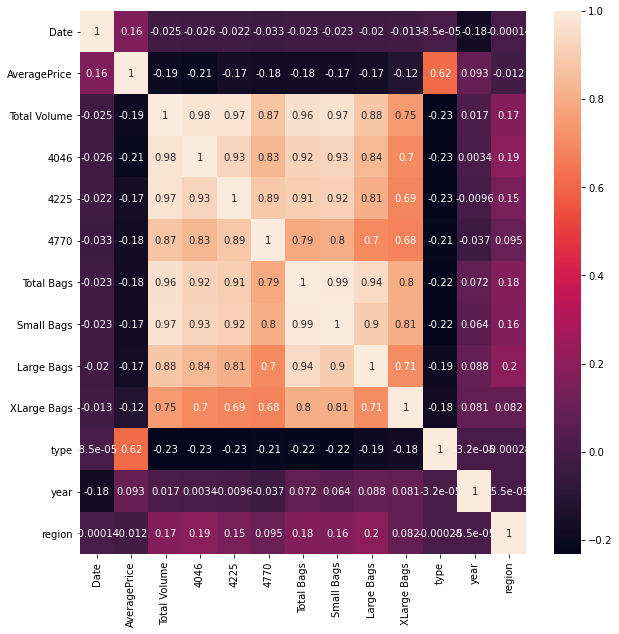

In [18]:
plt.figure(figsize=[10,10])
sn.heatmap(df.corr(),annot=True)

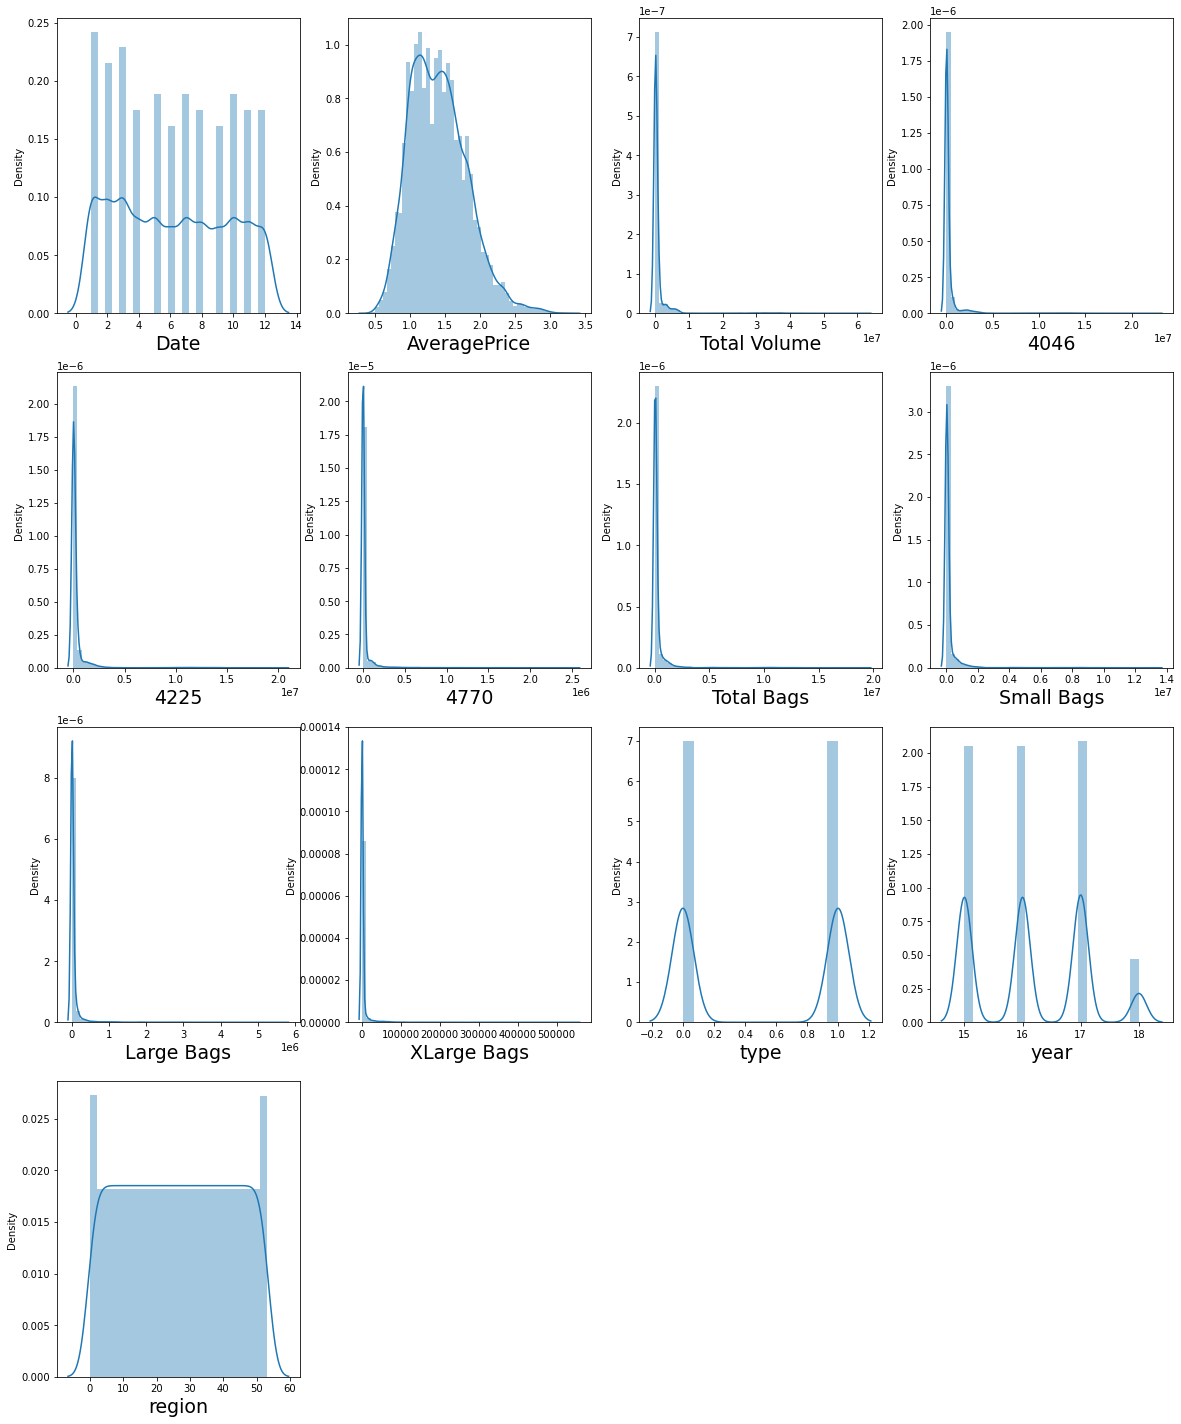

In [19]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df.columns:
    if plotnumber<=len(df.columns):
        ax=plt.subplot(4,4,plotnumber)
        sn.distplot(df[column])
        plt.xlabel(column,fontsize=19)
    plotnumber+=1
plt.show()

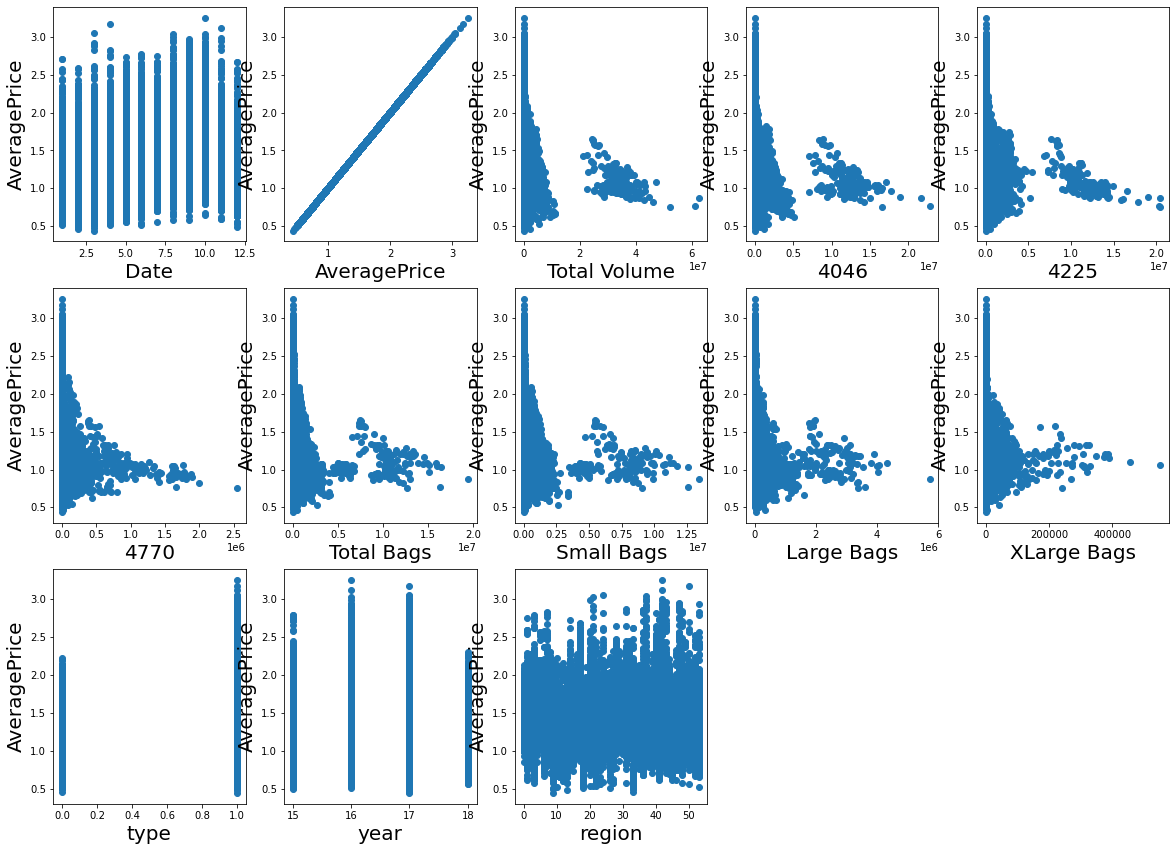

In [20]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for i in df.columns:
    if plotnumber<=len(df.columns):
        ax=plt.subplot(5,5,plotnumber)
        plt.scatter(df[i],df['AveragePrice'])
        plt.xlabel(i,fontsize=20)
        plt.ylabel('AveragePrice',fontsize=20)
    plotnumber+=1
plt.show()

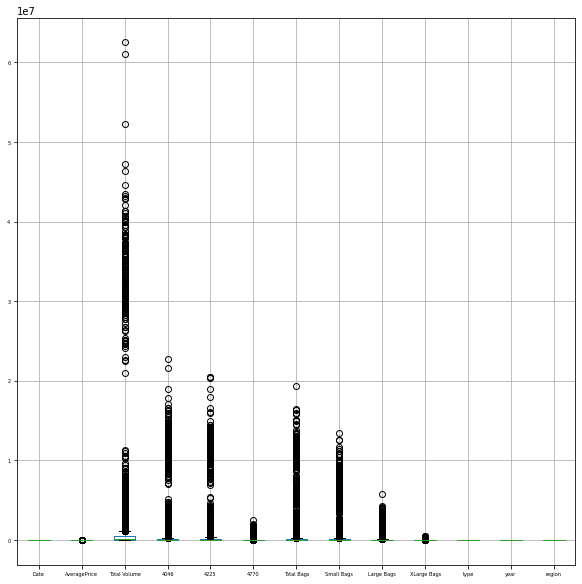

In [21]:
df.iloc[:,:].boxplot(figsize=[10,20],fontsize=5)#check for outliers
plt.subplots_adjust(bottom=0.5)
plt.show()

In [22]:
y = df[['AveragePrice']].values
x = df.drop(columns = ['AveragePrice'])

In [23]:
print(x.skew())

Date             0.106617
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
dtype: float64


In [24]:
print(len(x.skew().loc[x.skew()>0.55]))

8


In [25]:
for index in x.skew().index:
    if x.skew().loc[index] >0.55:
        x[index]=np.cbrt(x[index])

In [26]:
print(x.skew())

Date            0.106617
Total Volume    2.236143
4046            2.277861
4225            2.130378
4770            2.316048
Total Bags      2.302176
Small Bags      2.217682
Large Bags      2.186514
XLarge Bags     2.842255
type            0.000329
year            0.215339
region          0.000030
dtype: float64


In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']] = scaler.fit_transform(x[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']])
x

,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,12,-0.373714,-0.659077,-0.034740,-0.516446,-0.598284,-0.499147,-0.726623,-0.497449,0,15,0
1,12,-0.416209,-0.695853,-0.104144,-0.502067,-0.578275,-0.477634,-0.723402,-0.497449,0,15,0
2,12,-0.186355,-0.682425,0.247649,-0.430509,-0.612653,-0.514969,-0.719251,-0.497449,0,15,0
3,12,-0.314419,-0.650891,0.070758,-0.484502,-0.681931,-0.591191,-0.699057,-0.497449,0,15,0
4,11,-0.435033,-0.667781,-0.110236,-0.480881,-0.669753,-0.580158,-0.665220,-0.497449,0,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2,-0.670393,-0.589007,-0.788271,-0.734478,-0.493306,-0.392824,-0.582767,-0.497449,1,18,53
18245,1,-0.705946,-0.645993,-0.686526,-0.734478,-0.584109,-0.489994,-0.615341,-0.497449,1,18,53
18246,1,-0.707402,-0.645975,-0.732143,-0.195392,-0.580964,-0.479098,-0.776582,-0.497449,1,18,53
18247,1,-0.679622,-0.621105,-0.706268,-0.195622,-0.544766,-0.440319,-0.767092,-0.497449,1,18,53


In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1]) ]
vif["Features"] = x.columns
vif

,vif,Features
0,3.902691,Date
1,313.479707,Total Volume
2,36.722968,4046
3,58.939909,4225
4,4.465365,4770
5,182.684428,Total Bags
6,97.029816,Small Bags
7,12.821669,Large Bags
8,2.636285,XLarge Bags
9,3.618126,type


In [29]:
from sklearn.decomposition import PCA
for i in range(2,12):
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(x)
    print(i,sum(pca.explained_variance_ratio_))

2 0.9663302221345593
3 0.9915762991675835
4 0.9950983672541074
5 0.9967634740647245
6 0.9978383319183838
7 0.998546500240557
8 0.9991543376364861
9 0.9996709273285342
10 0.9999754734982422
11 0.9999915318139236


In [30]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(x)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def besttrain(model,x,y):
    random=0
    score=0
    for i in range(42,120):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = i,test_size=0.20,shuffle=True)
        model.fit(x_train,y_train)
        tmp=r2_score(y_test,model.predict(x_test))
        if tmp>score:
            score=tmp
            random=i
    return random

In [32]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR,NuSVR,LinearSVR
from sklearn.linear_model import LinearRegression,Ridge,RidgeCV,BayesianRidge,SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.svm import NuSVR
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor,XGBRFRegressor
from mlxtend.regressor import StackingCVRegressor

models=[GradientBoostingRegressor(),NuSVR(),LinearRegression(),Ridge(),RidgeCV(),BayesianRidge(),SGDRegressor(),SVR(),
       KNeighborsRegressor(),RandomForestRegressor(),BaggingRegressor(),
       DecisionTreeRegressor(),LGBMRegressor(), XGBRFRegressor(), AdaBoostRegressor(),LinearSVR(),XGBRegressor()]

In [33]:
import random
filename = "avocado.csv" 
n = sum(1 for line in open(filename))-1  # Calculate number of rows in file
s = n//10  # sample size of 10%
skip = sorted(random.sample(range(1, n+1), n-s))  # n+1 to compensate for header 
df = pd.read_csv(filename, skiprows=skip)
df=df.drop(['Unnamed: 0'],axis=1)
for i in range(len(df.Date)):
    df.Date[i]=int(df.Date[i][5:7])
for i in range(len(df.year)):
    df.year[i]=int(df.year[i]-2000)
dicty={}
for i in df[['type']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
for i in ['type']:
    df[i]=df[i].apply(lambda x:dicty[i][x])
dicty={}
for i in df[['region']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
for i in ['region']:
    df[i]=df[i].apply(lambda x:dicty[i][x])
df = df.astype({'Date': np.int})
y = df[['AveragePrice']].values
x = df.drop(columns = ['AveragePrice'])
for index in x.skew().index:
    if x.skew().loc[index] >0.55:
        x[index]=np.cbrt(x[index])
scaler = StandardScaler()
x[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']] = scaler.fit_transform(x[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']])
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)
for i in models:
    x_train,x_test,y_train,y_test=train_test_split(principalComponents,y,random_state = 42,test_size=0.20)
    scores=cross_val_score(i,x_train,y_train,cv=5,scoring='r2')
    score=np.mean(scores)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    if r2_score(y_test,y_pred)>score:
        diff=r2_score(y_test,y_pred)-score
    else:
        diff=score-r2_score(y_test,y_pred)
    print('*'*10)
    print(i)
    print('score',score)
    print('r2',r2_score(y_test,y_pred))
    print('diff',diff)
    print('mae',mean_absolute_error(y_test, y_pred))
    print('rmse',np.sqrt(mean_squared_error(y_test, y_pred)))

**********
GradientBoostingRegressor()
score 0.605398966466258
r2 0.6629871615574408
diff 0.05758819509118274
mae 0.18208280293142917
rmse 0.24556388796321504
**********
NuSVR()
score 0.4112645071449229
r2 0.4642655183750255
diff 0.05300101123010259
mae 0.2396999911727484
rmse 0.30961078322586416
**********
LinearRegression()
score 0.2637179245767119
r2 0.3395631570025408
diff 0.07584523242582891
mae 0.27392060876493557
rmse 0.34376125361531507
**********
Ridge()
score 0.2637218073091897
r2 0.33955368290034416
diff 0.07583187559115445
mae 0.27392059324332774
rmse 0.3437637192693762
**********
RidgeCV(alphas=array([ 0.1,  1. , 10. ]))
score 0.2637535951059018
r2 0.3394668745109871
diff 0.07571327940508532
mae 0.2739219848395491
rmse 0.3437863105031332
**********
BayesianRidge()
score 0.2637480358223733
r2 0.339117851504232
diff 0.07536981568185874
mae 0.2739355954397508
rmse 0.34387712614951144
**********
SGDRegressor()
score 0.12494648806050812
r2 -0.11399875454738861
diff 0.2389452426

In [34]:
parameters={'n_estimators': [100, 80, 60, 55, 51, 45],  
              'max_depth': [7, 8],
              'reg_lambda' :[0.26, 0.25, 0.2]}
clf = RandomizedSearchCV(XGBRegressor(), parameters, cv=5,scoring="r2")
clf.fit(principalComponents,y)
clf.best_params_

{'reg_lambda': 0.2, 'n_estimators': 60, 'max_depth': 7}

In [35]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
parameters={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}
clf = RandomizedSearchCV(LGBMRegressor(), parameters, cv=5,scoring="r2")
clf.fit(principalComponents,y)
clf.best_params_

{'colsample_bytree': 0.6279950874693182,
 'min_child_samples': 261,
 'min_child_weight': 1e-05,
 'num_leaves': 27,
 'reg_alpha': 5,
 'reg_lambda': 0,
 'subsample': 0.4303580490309683}

In [ ]:
parameters={"n_estimators":[10,100,500],'criterion':['mse', 'mae'],'max_features':['auto', 'sqrt', 'log2']}
clf = RandomizedSearchCV(RandomForestRegressor(), parameters, cv=5,scoring="r2")
clf.fit(principalComponents,y)
clf.best_params_

In [ ]:
besttrain(LGBMRegressor(),principalComponents,y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(principalComponents, y, random_state=95, test_size=0.2)
stack = StackingCVRegressor(regressors=(LGBMRegressor(colsample_bytree=0.9360121389006826,min_child_samples=255,
 min_child_weight=0.01,num_leaves= 48,reg_alpha=0,reg_lambda=0,subsample=0.29111503328106747), 
                                        RandomForestRegressor(criterion='mse',max_features='sqrt',n_estimators=500),
                                        XGBRegressor(max_depth=7,n_estimators=60,reg_lambda=0.26)
                                       ),
                            meta_regressor=LGBMRegressor(colsample_bytree=0.9360121389006826,min_child_samples=255,
 min_child_weight=0.01,num_leaves= 48,reg_alpha=0,reg_lambda=0,subsample=0.29111503328106747), 
                            cv=12,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False)
stack.fit(X_train, y_train)
pred = stack.predict(X_test)
score = r2_score(y_test, pred)
print('r2 score test',score)
pred = stack.predict(X_train)
score = r2_score(y_train, pred)
print('r2 score train',score)

In [ ]:
y_pred=stack.predict(principalComponents)
data=x
data['AveragePricePred']=y_pred
data['AveragePrice']=y
data['differnce']=data['AveragePrice']-data['AveragePricePred']
data

In [ ]:
sn.distplot(data['AveragePrice'])
sn.distplot(data['AveragePricePred'])

In [ ]:
import joblib #Save model
joblib.dump(stack,'Avocado.pkl')